# Rank-deficient least-squares problem

## Regularized linear least-squares proble, Tikhonov regularization

\begin{equation}
\min_{x\in \mathbb R^{n}} \frac{1}{2} \|Ax-b\|_{2}^{2} + \frac{\tau}{2}\|x\|_{2}^{2}.
\end{equation}
Here $\lambda>0$ is the regularization parameter, not known a priori and it is determined based on the problem data.

- SVD decomposition: $A = U\Sigma V^{T}$, where $U\in \mathbb R^{m\times m}$ and $ V\in \mathbb R^{m\times n}$ and $\Sigma \in \mathbb{R}^{m\times n}$
\begin{equation}
\sigma_{1} \geq \ldots \geq \sigma_{r} > \sigma_{r+1} = \ldots = \sigma_{\min\{m,n\}} = 0.
\end{equation}

### Solution of regularized least-squares problem
\begin{equation}
x_{\tau} = \sum_{i=1}^{r} \frac{\sigma_{i} (u_{i}^{T}b) }{\sigma_{i}^{2} + \tau} v_{i}
\end{equation}

- Note that:
\begin{equation}
\lim_{\tau\rightarrow 0 } x_{\tau} = \lim_{\tau \rightarrow 0} \sum_{i=1}^{r} \frac{\sigma_{i} (u_{i}^{T}b) }{\sigma_{i}^{2} + \tau} v_{i} =   \sum_{i=1}^{r}\frac{(u_{i}^{T}b) }{\sigma_{i}} v_{i} = x,
\end{equation}
solution of least-squares problem
- Regularizing property:
\begin{equation}
 \frac{\sigma_{i} (u_{i}^{T}b) }{\sigma_{i}^{2} + \tau} \approx \left\{
 \begin{array}{ll}
 0,& \mbox{if } \sigma_{i} \ll \tau \\
  \frac{(u_{i}^{T}b) }{\sigma_{i}},& \mbox{if } \sigma_{i}\gg \tau 
 \end{array} \right.
\end{equation}

### How to choose $\tau$?
Assume that $b$ is perturbed by $\Delta b$, $\tilde{b} = b + \Delta b$, we want to compute solution
\begin{equation}
x = \sum_{i=1}^{r} \frac{u_i^{T} b}{\sigma_{i}} v_i
\end{equation}
but we can only compute with $\tilde{b}$.
\begin{equation}
x_{\tau} = \sum_{i=1}^{r} \left( \frac{\sigma_{i} (u_{i}^{T}b) }{\sigma_{i}^{2} + \tau}  + 
 \frac{\sigma_{i} (u_{i}^{T}\Delta b) }{\sigma_{i}^{2} + \tau} \right) v_{i}
\end{equation}
We have the same properties as before:
- \begin{equation}
\lim_{\tau\rightarrow 0 } x_{\tau} = \lim_{\tau \rightarrow 0}  \sum_{i=1}^{r} \frac{\sigma_{i} (u_{i}^{T}b) }{\sigma_{i}^{2} + \tau} v_{i} =   \sum_{i=1}^{r}\frac{(u_{i}^{T}b) }{\sigma_{i}} v_{i} = x,
\end{equation}
- \begin{equation}
 \frac{\sigma_{i} (u_{i}^{T}\Delta b) }{\sigma_{i}^{2} + \tau} \approx \left\{
 \begin{array}{ll}
 0,& \mbox{if } \sigma_{i} \ll \tau \\
  \frac{(u_{i}^{T}\Delta b) }{\sigma_{i}},& \mbox{if } \sigma_{i}\gg \tau 
 \end{array} \right.
\end{equation}
$\rightarrow$ choose $\tau$ sufficiently large to ensure that the perturbation $\Delta b$ in the data are not magnified by small singular values.

In [1]:
import numpy as np

In [2]:
t = np.zeros(11)

for j in range(0,11):
    t[j] = 10**(-j)

#t = np.linspace(0,1,11)
print(t)

Av = np.vander(t, 6, increasing=True)
print(Av)
x_exact = np.ones(6)
b_exact =  Av.dot(x_exact)
deltab = np.multiply(0.0001*np.random.rand(b_exact.size), b_exact)#(0.5-np.diag(np.random.rand(b_exact.size)))*b_exact
b = b_exact+deltab
print("|b-b_exact|/|b| = ", np.linalg.norm(b-b_exact)/np.linalg.norm(b))
# compute SVD of A
U,S,V = np.linalg.svd(Av, full_matrices=False)

#U,S,V = np.linalg.svd(Av)
#print(S)
y1 = np.dot(U.T,b)
y2 = y1/S
x_svd = np.dot(V.T,y2)
print("|x-x_svd|/|x| = ", np.linalg.norm(x_exact-x_svd)/np.linalg.norm(x_exact))


[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10]
[[1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00]
 [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]
 [1.e+00 1.e-02 1.e-04 1.e-06 1.e-08 1.e-10]
 [1.e+00 1.e-03 1.e-06 1.e-09 1.e-12 1.e-15]
 [1.e+00 1.e-04 1.e-08 1.e-12 1.e-16 1.e-20]
 [1.e+00 1.e-05 1.e-10 1.e-15 1.e-20 1.e-25]
 [1.e+00 1.e-06 1.e-12 1.e-18 1.e-24 1.e-30]
 [1.e+00 1.e-07 1.e-14 1.e-21 1.e-28 1.e-35]
 [1.e+00 1.e-08 1.e-16 1.e-24 1.e-32 1.e-40]
 [1.e+00 1.e-09 1.e-18 1.e-27 1.e-36 1.e-45]
 [1.e+00 1.e-10 1.e-20 1.e-30 1.e-40 1.e-50]]
|b-b_exact|/|b| =  3.6707822976918126e-05
|x-x_svd|/|x| =  199017.48108520504


In [87]:
N= 12
error = np.zeros(N, dtype=np.float64)
tau   = np.zeros(N, dtype=np.float64)
print("\sigma:", S)
for i in range(0,N): # solve regularized LLS for different lambda
    tau[i] = 10**(-i)
    y1 = np.dot(U.T,b)

    coeff = np.zeros(S.size)
    for j in range(S.size):
        coeff[j] = S[j]/(S[j]**2+tau[i])
    print("sigma approx ",coeff)
    y2 = np.multiply(y1,coeff) 
    #print("y2", y2)
    x_tau = np.dot(V.T,y2)
    #x_tau = V * (sigma.dot((U.T).dot(b)) / (sigma.^2 + lambda(i+1)))
    
    error[i] = np.linalg.norm(x_tau - x_exact);
    #print("x_tau", x_tau)
print(error)

\sigma: [3.43155988e+00 2.05616208e+00 8.24366681e-02 7.24430072e-04
 6.64057352e-07 5.48049344e-11]
sigma approx  [2.68602572e-01 3.93312885e-01 8.18802261e-02 7.24429692e-04
 6.64057352e-07 5.48049344e-11]
sigma approx  [2.88958785e-01 4.75105341e-01 7.71909240e-01 7.24426270e-03
 6.64057352e-06 5.48049344e-10]
sigma approx  [2.91165401e-01 4.85195353e-01 4.90817033e+00 7.24392056e-02
 6.64057352e-05 5.48049344e-09]
sigma approx  [2.91387917e-01 4.86227976e-01 1.05744918e+01 7.24050091e-01
 6.64057352e-04 5.48049344e-08]
sigma approx  [2.91410188e-01 4.86331480e-01 1.19546126e+01 7.20648118e+00
 6.64057349e-03 5.48049344e-07]
sigma approx  [2.91412415e-01 4.86341833e-01 1.21127004e+01 6.88307755e+01
 6.64057323e-02 5.48049344e-06]
sigma approx  [2.91412637e-01 4.86342868e-01 1.21287395e+01 4.75098754e+02
 6.64057059e-01 5.48049344e-05]
sigma approx  [2.91412660e-01 4.86342972e-01 1.21303457e+01 1.15946113e+03
 6.64054424e+00 5.48049344e-04]
sigma approx  [2.91412662e-01 4.86342982e-0

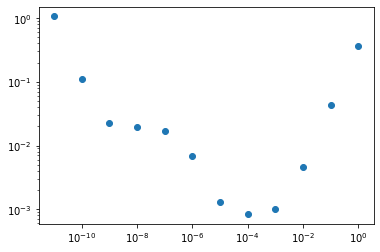

In [89]:
import matplotlib.pyplot as plt
plt.loglog(tau, error,'o')

$\tau \approx 10^{-4}$ seems to be a good choice for the regularization parameter $\tau$.

### Morozov discrepancy principle

We do not know the perturbation $\Delta b$ but we assume its size $\|\Delta b\|$

- Observe, for $A x = b$: 
\begin{equation}
\| A x - \tilde{b} \| = \| A x - b - \Delta b \| = \|\Delta b\| 
\end{equation}
$\rightarrow$ we want to find a regularization parameter $\tau$ such that $x_\tau$ satisfies
\begin{equation}
\|A x_{\tau} - \tilde{b}\| = \|\Delta b\|
\end{equation}

We obtain f the problem of finding $\tau\geq 0$ such that 
\begin{equation}
        \|A x_{\tau} - \tilde{b}\| = \|\Delta b\| \Longleftrightarrow f(\tau) :=  \|A x_{\tau} - \tilde{b}\| - \|\Delta b\|  = 0
\end{equation}

We have a root finding problem. 


In [ ]:
##